In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\user\\Downloads\\Salary_Data (1).csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


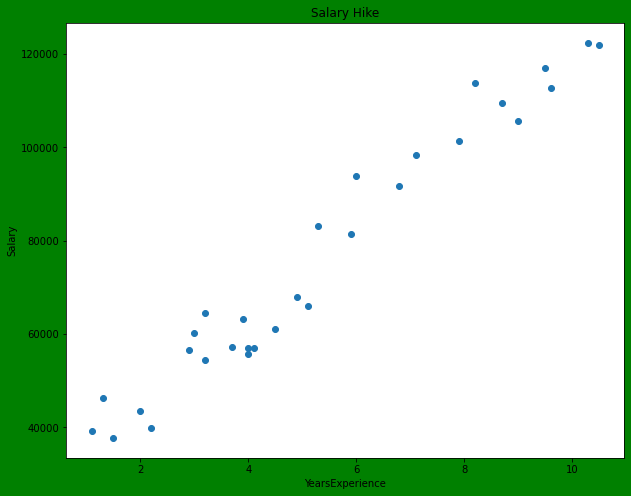

In [5]:
plt.figure(figsize=(10,8),facecolor='green')
plt.scatter(data["YearsExperience"],data["Salary"])
plt.title("Salary Hike")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
lm=LinearRegression()
x=data["YearsExperience"].values.reshape(-1,1)
y=data["Salary"].values.reshape(-1,1)

In [8]:
lm.fit(x,y)

LinearRegression()

In [9]:
print(lm.coef_)

[[9449.96232146]]


In [10]:
print(lm.intercept_)

[25792.20019867]


In [11]:
lm.predict(x)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

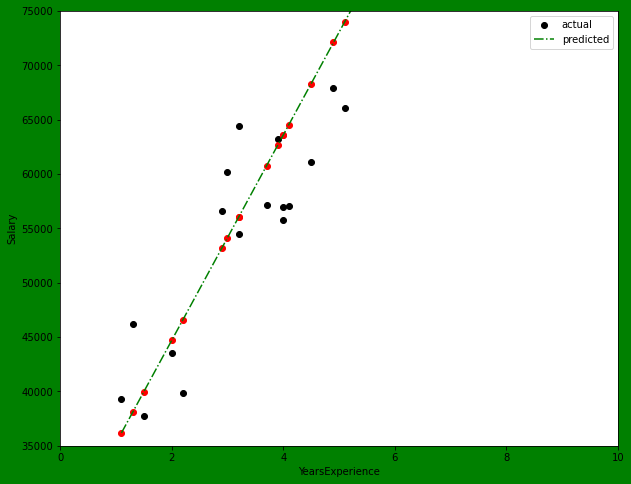

In [12]:
plt.figure(figsize=(10,8),facecolor="green")
plt.scatter(data.YearsExperience, data.Salary, color="black", label="actual")
plt.plot(data.YearsExperience, lm.predict(x), label="predicted", color="green", linestyle="-.")
plt.scatter(data.YearsExperience, lm.predict(x), color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.xlim(0,10)
plt.ylim(35000,75000)
plt.legend(loc="best")
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

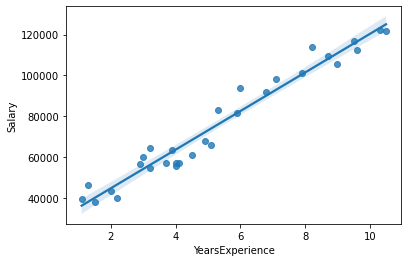

In [13]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [14]:
pred_train_lm=lm.predict(x)
r2_score(data["YearsExperience"],pred_train_lm)

-831162525.0988073

In [15]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [17]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        16:08:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [20]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [21]:
model.rsquared

0.9569566641435086

In [22]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        16:09:07   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2.rsquared

0.8538888828756969

In [32]:
model3=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        16:09:47   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3.rsquared

0.9319671194084195

In [36]:
data["YearsExperience_sq"]=data.YearsExperience**2

In [37]:
model4=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data=data).fit()

In [38]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           3.95e-18
Time:                        16:12:17   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model4.rsquared

0.948610863848735

In [ ]:
#model1 has highest rsquare value near to 1

In [23]:
#manual prediction for 3years experience
Salary=25792.200199+9449.962321*3

In [24]:
Salary

54142.087162

In [25]:
#automatic prediction for 3,5,7 years experience
data1=pd.Series([3,5,7])

In [26]:
data1

0    3
1    5
2    7
dtype: int64

In [27]:
predicted_data=pd.DataFrame(data1,columns=['YearsExperience'])

In [28]:
predicted_data

,YearsExperience
0,3
1,5
2,7


In [29]:
model.predict(predicted_data)

0    54142.087163
1    73042.011806
2    91941.936449
dtype: float64